In [20]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=6)

import warnings
warnings.simplefilter(action='ignore')

#https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [21]:
# Read CSV
file_name1 = 'stroke.csv'
stroke_df = pd.read_csv(file_name1)

# preview data
print(stroke_df.describe())

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

In [22]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


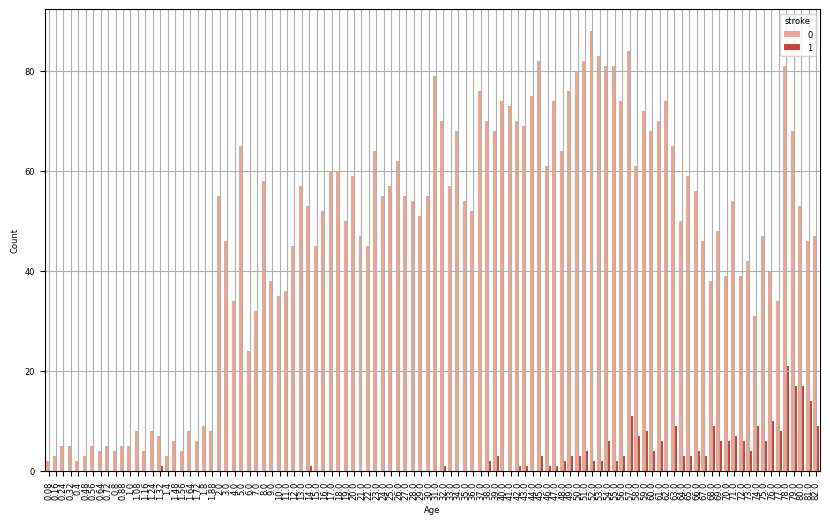

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='stroke', data=stroke_df, palette='Reds')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.grid(True)
plt.show()


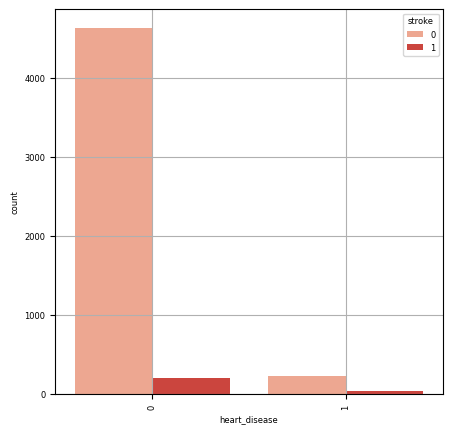

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.countplot(x='heart_disease', hue='stroke', data=stroke_df, palette='Reds')
plt.xlabel('heart_disease')
plt.ylabel('count')
plt.xticks(rotation=90)  # Rotate x-axis labels 90 degrees

plt.grid(True)
plt.show()


In [25]:
#Checking for missing values
print(stroke_df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

feature_columns = ['age']  # List of feature columns
target_column = ['stroke']   # Target column

X = stroke_df[feature_columns]
y = stroke_df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

y_pred = log_reg_model.predict(X_test)


In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9393346379647749


In [31]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



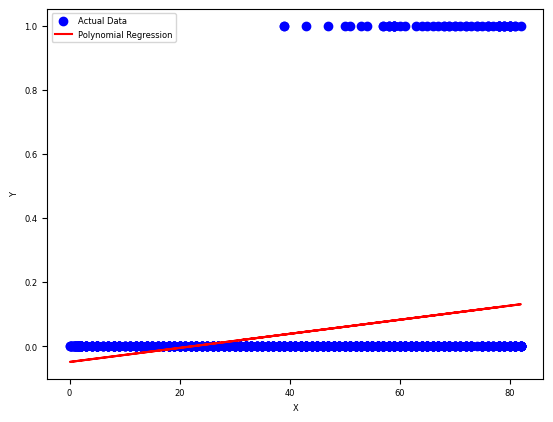

In [29]:
#Don't think we need this since we figured out logistic regression suits the best
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Creating polynomial features
poly = PolynomialFeatures(degree=1) 
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Fitting linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_poly_train, y_train)

# Plotting the results
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, lin_reg.predict(X_poly_test), color='red', label='Polynomial Regression')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [9]:
correlation = stroke_df['age'].corr(stroke_df['stroke'])
correlation

0.2452573461709736

<AxesSubplot:>

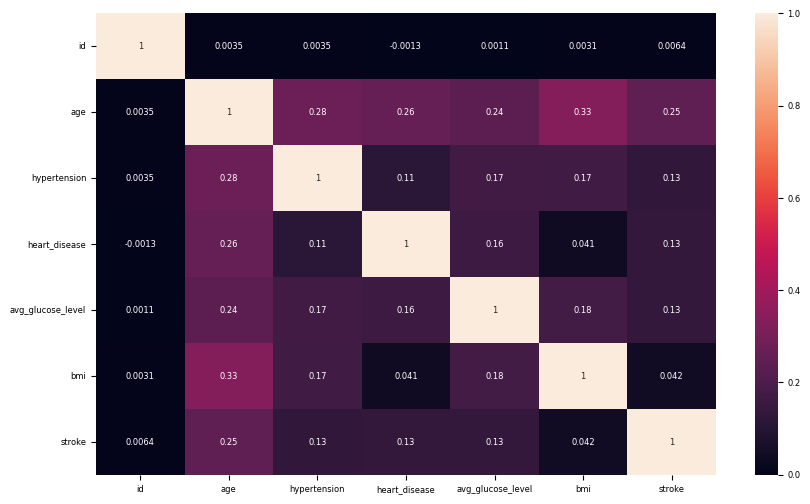

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(stroke_df.corr(),annot=True)

In [32]:
print("Correlation between variables:")
print(correlation_matrix)

Correlation between variables:
                         id       age  hypertension  heart_disease  \
id                 1.000000  0.003538      0.003550      -0.001296   
age                0.003538  1.000000      0.276398       0.263796   
hypertension       0.003550  0.276398      1.000000       0.108306   
heart_disease     -0.001296  0.263796      0.108306       1.000000   
avg_glucose_level  0.001092  0.238171      0.174474       0.161857   
bmi                0.003084  0.333398      0.167811       0.041357   
stroke             0.006388  0.245257      0.127904       0.134914   

                   avg_glucose_level       bmi    stroke  
id                          0.001092  0.003084  0.006388  
age                         0.238171  0.333398  0.245257  
hypertension                0.174474  0.167811  0.127904  
heart_disease               0.161857  0.041357  0.134914  
avg_glucose_level           1.000000  0.175502  0.131945  
bmi                         0.175502  1.000000  0.0423

In [33]:
feature_importance = model.coef_[0]
feature_names = X.columns

In [34]:
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

print("\nFeature Importance:")
print(feature_importance_df)


Feature Importance:
  Feature  Importance
0     age    1.634638


In [35]:
#Further testing our model 
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Evaluate the Random Forest model
rf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Random Forest Cross-Validation Scores:", rf_scores)
print("Mean Accuracy:", rf_scores.mean())

Random Forest Cross-Validation Scores: [0.95476773 0.95354523 0.95354523 0.95471236 0.95471236]
Mean Accuracy: 0.9542565830622498


In [36]:
feature_importance_rf = rf_model.feature_importances_
feature_importance_df_rf = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance_rf})
feature_importance_df_rf = feature_importance_df_rf.sort_values(by="Importance", ascending=False)
print("Random Forest Feature Importance:")
print(feature_importance_df_rf)


Random Forest Feature Importance:
  Feature  Importance
0     age         1.0


In [37]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lr_scores_cv = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
print("Logistic Regression Cross-Validation Scores:")
print(lr_scores_cv)
print("Mean Accuracy (Logistic Regression CV):", lr_scores_cv.mean())


Logistic Regression Cross-Validation Scores:
[0.95476773 0.95354523 0.95354523 0.95471236 0.95471236]
Mean Accuracy (Logistic Regression CV): 0.9542565830622498
